In [1]:
from tree_detection_framework.preprocessing.preprocessing import (
    create_dataloader,
    visualize_dataloader,
)
from tree_detection_framework.detection.detector import RandomDetector
from tree_detection_framework.postprocessing.postprocessing import multi_region_NMS

In [ ]:
# Create the dataloader
raster_dir = "/ofo-share/scratch-amritha/emerald_point_dtree2/dataset/emerald-point-ortho"  # Path to raster image
dataloader = create_dataloader(
    raster_folder_path=raster_dir,
    chip_size=100,
    chip_stride=80,
    use_units_meters=True,
    resolution=0.2,
)

/ofo-share/repos-david/conda/envs/tree-detection-framework2/lib/python3.10/site-packages/rasterio/merge.py:369: NodataShadowWarning: The dataset's nodata attribute is shadowing the alpha band. All masks will be determined by the nodata attribute
  temp_src = src.read(


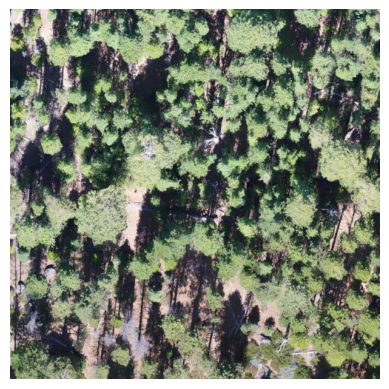

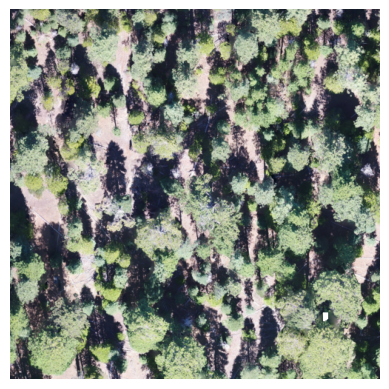

In [3]:
# Visualize a few samples
visualize_dataloader(dataloader, 2)

In [4]:
# Instantiate a random detector
random_detector = RandomDetector()
# Generate the random predictions for each sample in the dataloader
region_detection_set = random_detector.predict(
    dataloader,
    detection_size_fraction=0.25,
    detections_per_tile=10,
)

/ofo-share/repos-david/conda/envs/tree-detection-framework2/lib/python3.10/site-packages/rasterio/merge.py:369: NodataShadowWarning: The dataset's nodata attribute is shadowing the alpha band. All masks will be determined by the nodata attribute
  temp_src = src.read(
/ofo-share/repos-david/conda/envs/tree-detection-framework2/lib/python3.10/site-packages/rasterio/merge.py:369: NodataShadowWarning: The dataset's nodata attribute is shadowing the alpha band. All masks will be determined by the nodata attribute
  temp_src = src.read(
/ofo-share/repos-david/conda/envs/tree-detection-framework2/lib/python3.10/site-packages/rasterio/merge.py:369: NodataShadowWarning: The dataset's nodata attribute is shadowing the alpha band. All masks will be determined by the nodata attribute
  temp_src = src.read(
/ofo-share/repos-david/conda/envs/tree-detection-framework2/lib/python3.10/site-packages/rasterio/merge.py:369: NodataShadowWarning: The dataset's nodata attribute is shadowing the alpha band. 

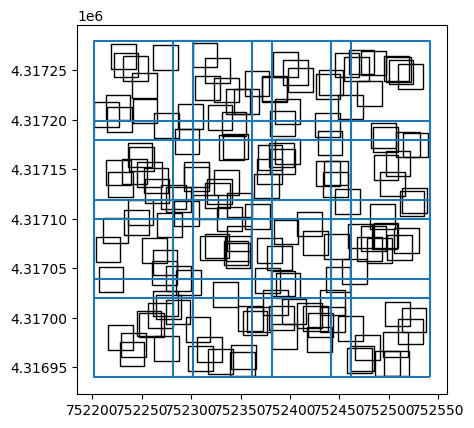

<Axes: >

In [5]:
# Plot the detections
region_detection_set.plot()

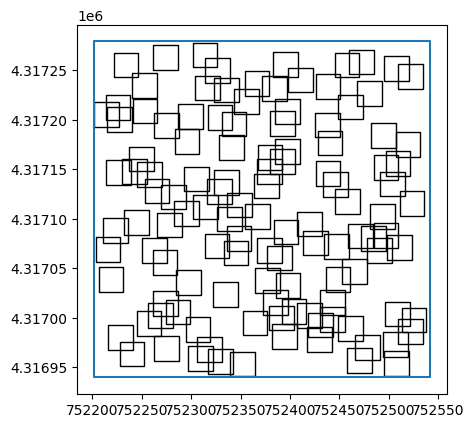

<Axes: >

In [6]:
# Run NMS and plot again
NMS_region_detections = multi_region_NMS(region_detection_set, iou_theshold=0.3)
NMS_region_detections.plot()